In [8]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  공공도서관 프로그램
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"서구 공공도서관, 독서의 달 행사 운영",http://www.dtnews24.com/news/articleView.html?...
1,"칠곡군립도서관, 독서의 달 맞아 행사 다채",http://www.hidomin.com/news/articleView.html?i...
2,"남양주시 와부도서관, '공공도서관 문화가 있는 날' 공연",https://www.gukjenews.com/news/articleView.htm...
3,"천안쌍용도서관, 시민독서릴레이 선포식",https://www.viva100.com/main/view.php?key=2022...
4,"양산도서관, 신축 개관 1주년 행사 '풍성'",http://www.newsgn.com/333459
...,...,...
995,"용인도서관, 독서의 달 맞아 온라인 독서.문화 프로그램 ‘풍성’",http://www.shinailbo.co.kr/news/articleView.ht...
996,전주덕진공원에 한국의멋 담은 연화정도서관 개관,https://www.pressian.com/pages/articles/202206...
997,"남양주시 와부도서관, ‘정보 취약계층 독서 문화 프로그램’ 공모 사업 선정",http://www.breaknews.com/892747
998,"대구 두류도서관, 2021년 새 학년 맞이 특별강좌 수강생 모집",http://www.veritas-a.com/news/articleView.html...


In [92]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [93]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
도서관,1136
프로그램,438
운영,337
독서,274
문화,192
...,...
증평,1
군수,1
일요일,1
야간,1


In [94]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [103]:
df_stop_words = df_test.head(30)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,도서관,1136
1,프로그램,438
2,운영,337
3,독서,274
4,문화,192
5,사업,123
6,선정,111
7,모집,79
8,장애인,76
9,공모,76


In [104]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [105]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [106]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
진행,29
온라인,29
작가,28
교실,28
특강,27
...,...
증평,1
군수,1
일요일,1
야간,1


In [107]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

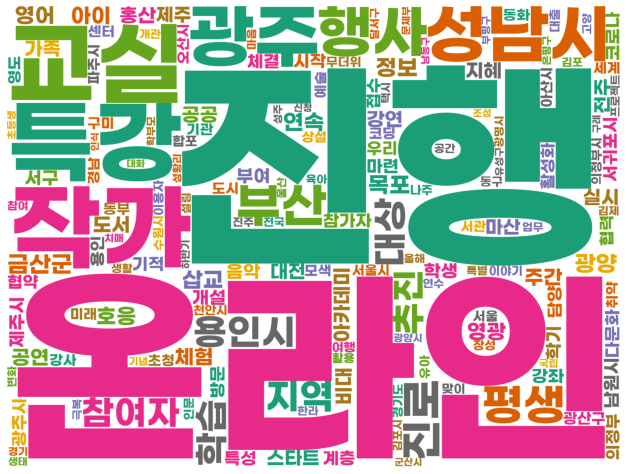

In [108]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기